In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# 데이터셋 경로와 압축을 풀 폴더 설정
zip_file_path = '/content/drive/MyDrive/wildfire_smoke_detector/fireandsmoke.zip'
output_folder = '/content/fireandsmoke/'

# 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

print(f"파일이 {output_folder} 폴더에 압축 해제되었습니다.")

파일이 /content/fireandsmoke/ 폴더에 압축 해제되었습니다.


In [ ]:
import os

# 압축 풀린 데이터가 있는 폴더 확인
data_folder = '/content/fireandsmoke/'

# 전체 파일 목록 출력
print(os.listdir(data_folder))

['FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET']


In [ ]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 27.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 데이터 전처리 (이미지 크기 변경, 텐서로 변환)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기 조정
    transforms.ToTensor(),          # 텐서로 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 정규화
])

# Train과 Test 데이터셋 로드
train_dir = '/content/fireandsmoke/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train'
test_dir = '/content/fireandsmoke/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test'

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# DataLoader로 배치 처리
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 데이터셋 크기 확인
print(f"훈련 데이터셋 크기: {len(train_dataset)}")
print(f"테스트 데이터셋 크기: {len(test_dataset)}")

훈련 데이터셋 크기: 32398
테스트 데이터셋 크기: 10500


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# 모델 불러오기 (ResNet18)
model = models.resnet18(pretrained=True)

# 마지막 FC layer 수정 (3개의 클래스: fire, non_fire, smoke)
model.fc = nn.Linear(model.fc.in_features, 3)

# 모델을 GPU로 보내기 (CUDA 사용 여부 체크)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# 손실 함수와 최적화 함수 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# 손실 함수와 최적화 함수 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # 학습 모드로 설정
    running_loss = 0.0

    # 학습 데이터셋에서 배치별로 데이터를 가져옴
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Gradient 초기화
        optimizer.zero_grad()

        # 모델 출력
        outputs = model(inputs)

        # 손실 계산
        loss = criterion(outputs, labels)
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)  # 평균 손실
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

Epoch [1/1], Loss: 0.1571


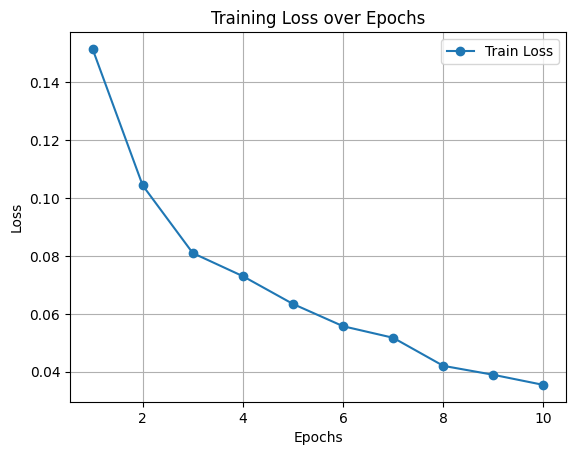

In [ ]:
import matplotlib.pyplot as plt

# 손실 값 저장용 리스트
train_losses = [
    0.1516, 0.1044, 0.0810, 0.0730, 0.0634, 0.0557, 0.0517, 0.0420, 0.0389, 0.0354  # 위에서 나온 손실 값
]

# 그래프 그리기
plt.plot(range(1, 11), train_losses, label="Train Loss", marker='o')  # 1부터 10까지 에폭에 대해 손실 값 시각화
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 모델 평가
model.eval()  # 평가 모드로 변경
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total * 100
print(f"모델 정확도: {accuracy:.2f}%")

모델 정확도: 96.31%


In [ ]:
# 모델 저장 경로
model_save_path = '/content/fire_smoke_model.pth'

# 모델 저장
torch.save(model.state_dict(), model_save_path)

print(f"모델이 저장되었습니다: {model_save_path}")

모델이 저장되었습니다: /content/fire_smoke_model.pth


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 모델 파일 경로 설정
model_path = '/content/drive/MyDrive/wildfire_smoke_detector/fire_smoke_model.pth'

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

# 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 클래스 이름 정의
class_names = ['fire', 'non_fire', 'smoke']

In [ ]:
from torchvision import models
import torch.nn as nn
import torch

# 모델 정의
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 3)  # 클래스 수 3개

# 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 저장된 모델 불러오기
model.load_state_dict(torch.load('/content/drive/MyDrive/wildfire_smoke_detector/fire_smoke_model.pth', map_location=device))
model.eval()
print("✅ 저장된 모델을 성공적으로 불러왔습니다.")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/wildfire_smoke_detector/fire_smoke_model.pth'

In [ ]:
def load_model(path, device):
    model = models.resnet18(pretrained=False)
    model.fc = nn.Linear(model.fc.in_features, 3)
    model.load_state_dict(torch.load(path, map_location=device))
    model.to(device)
    model.eval()
    return model

model = load_model(model_path, device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-4-908898933df0>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/wildfire_smoke_detector/fire_smoke_model.pth'))
model.eval()  # 평가 모드로 설정

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/wildfire_smoke_detector/fire_smoke_model.pth'

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

# 모델 불러오기 (ResNet18)
model = models.resnet18(pretrained=True)

# 마지막 FC layer 수정 (3개의 클래스: fire, non_fire, smoke)
model.fc = nn.Linear(model.fc.in_features, 3)

# 모델을 GPU로 보내기 (CUDA 사용 여부 체크)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# 모델 로드
model.load_state_dict(torch.load('/content/drive/MyDrive/fire_smoke_model_folder/fire_smoke_model.pth'))  # 학습된 모델 불러오기
model.eval()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/fire_smoke_model_folder/fire_smoke_model.pth'

In [ ]:
# 클래스 불균형을 해결하기 위해 가중치를 추가
class_weights = torch.tensor([1.0, 1.0, 2.0]).to(device)  # 예시: 'smoke'에 가중치를 더 많이 부여

# 손실 함수 수정
criterion = nn.CrossEntropyLoss(weight=class_weights)

In [ ]:
import torch
from torchvision import models
import torch.nn as nn

# 모델 구조가 학습 시와 동일한지 확인
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 3)  # 3개 클래스

# 모델 로드
model.load_state_dict(torch.load('/content/drive/MyDrive/wildfire_smoke_detector/fire_smoke_model.pth'))
model.eval()  # 평가 모드로 전환

# 정확한 클래스 순서로 설정
class_names = ['fire', 'smoke', 'non_fire']  # 실제 학습 시 사용한 클래스 순서

# 이미지 업로드 및 예측 과정은 위 코드와 동일하게 실행

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/wildfire_smoke_detector/fire_smoke_model.pth'

Saving example2.jpg to example2.jpg
🔥 예측 결과: non_fire


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


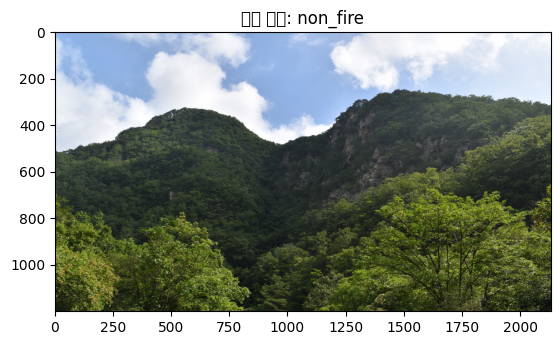

In [ ]:
from google.colab import files
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# 모델 로드 (학습된 모델 로드)
import torch
from torchvision import models

# 모델 로드 (ResNet18)
model = models.resnet18(pretrained=True)

# 마지막 FC layer 수정 (3개의 클래스: fire, non_fire, smoke)
model.fc = torch.nn.Linear(model.fc.in_features, 3)

# 모델을 GPU로 보내기 (CUDA 사용 여부 체크)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# 학습된 모델 로드
model.load_state_dict(torch.load('/content/drive/MyDrive/fire_smoke_model_folder/fire_smoke_model.pth'))  # 모델 경로 확인
model.eval()

# 이미지 업로드
uploaded = files.upload()

# 업로드된 이미지 파일명 가져오기
image_path = list(uploaded.keys())[0]

# 이미지 전처리
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기 조정
    transforms.ToTensor(),  # 텐서로 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 정규화
])

# 이미지 로드 및 변환
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)

# 모델 예측
with torch.no_grad():
    output = model(input_tensor)
    _, predicted = torch.max(output, 1)

# 클래스 이름 (예: 'fire', 'non_fire', 'smoke')
class_names = ['Smoke', 'fire', 'non_fire']  # 정확한 클래스 순서 확인 필요
print(f"🔥 예측 결과: {class_names[predicted.item()]}")

# 이미지를 출력 (선택사항)
plt.imshow(image)
plt.title(f"예측 결과: {class_names[predicted.item()]}")
plt.show()

In [ ]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

# 이메일 발송 함수 정의
def send_email(subject, body, to_email):
    from_email = "your_email@gmail.com"  # 보내는 이메일
    password = "your_email_password"  # 보내는 이메일 비밀번호 (앱 비밀번호 사용 권장)

    # 이메일 서버 설정
    smtp_server = "smtp.gmail.com"
    smtp_port = 587

    # 이메일 내용 구성
    msg = MIMEMultipart()
    msg['From'] = from_email
    msg['To'] = to_email
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    # 이메일 서버 연결 및 전송
    try:
        server = smtplib.SMTP(smtp_server, smtp_port)
        server.starttls()  # TLS 암호화
        server.login(from_email, password)  # 로그인
        text = msg.as_string()
        server.sendmail(from_email, to_email, text)  # 이메일 전송
        server.quit()
        print("이메일이 성공적으로 전송되었습니다.")
    except Exception as e:
        print(f"이메일 전송 실패: {e}")

# 예시: fire 또는 smoke 예측 시 이메일 알림 보내기
predicted_class = "fire"  # 예시로 fire를 예측했다고 가정

if predicted_class in ['fire', 'smoke']:
    subject = "🔥 경고: 화재 또는 연기 감지됨"
    body = f"예측 결과: {predicted_class}\n시스템에서 화재나 연기를 감지했습니다. 즉시 확인이 필요합니다."
    to_email = "recipient_email@example.com"  # 알림을 받을 이메일 주소

    send_email(subject, body, to_email)

이메일 전송 실패: (535, b'5.7.8 Username and Password not accepted. For more information, go to\n5.7.8  https://support.google.com/mail/?p=BadCredentials d2e1a72fcca58-73bd2198c0bsm4441874b3a.23 - gsmtp')


In [ ]:
from google.colab import files

# 파일 다운로드
files.download('/content/fire_smoke_model.pth')